# Phase 2: Exploratory Data Analysis (EDA) on Time Series Data (25 Points)

## Step 0: Load Packages & Data

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.sparse import csr_matrix
import gzip
import json
from statsmodels.tsa.seasonal import STL

In [4]:
# Load data from pickle files
with open('tra_X_tr.pkl', 'rb') as f:
    tra_X_tr = pickle.load(f)

with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

with open('tra_X_te.pkl', 'rb') as f:
    tra_X_te = pickle.load(f)

with open('tra_Y_te.pkl', 'rb') as f:
    tra_Y_te = pickle.load(f)

with open('tra_adj_mat.pkl', 'rb') as f:
    tra_adj_mat = pickle.load(f)

# Check the data to ensure it is loaded correctly
print(f"Training Input Shape: {tra_X_tr[0][0].shape}")
print(f"Training Output Shape: {tra_Y_tr.shape}")
print(f"Test Input Shape: {tra_X_te[0][0].shape}")
print(f"Test Output Shape: {tra_Y_te.shape}")
print(f"Adjacency Matrix Shape: {tra_adj_mat.shape}")

Training Input Shape: (36, 48)
Training Output Shape: (36, 1261)
Test Input Shape: (36, 48)
Test Output Shape: (36, 840)
Adjacency Matrix Shape: (36, 36)


## Step 1: Visualizations

### Time-Series Plot (5 Points)

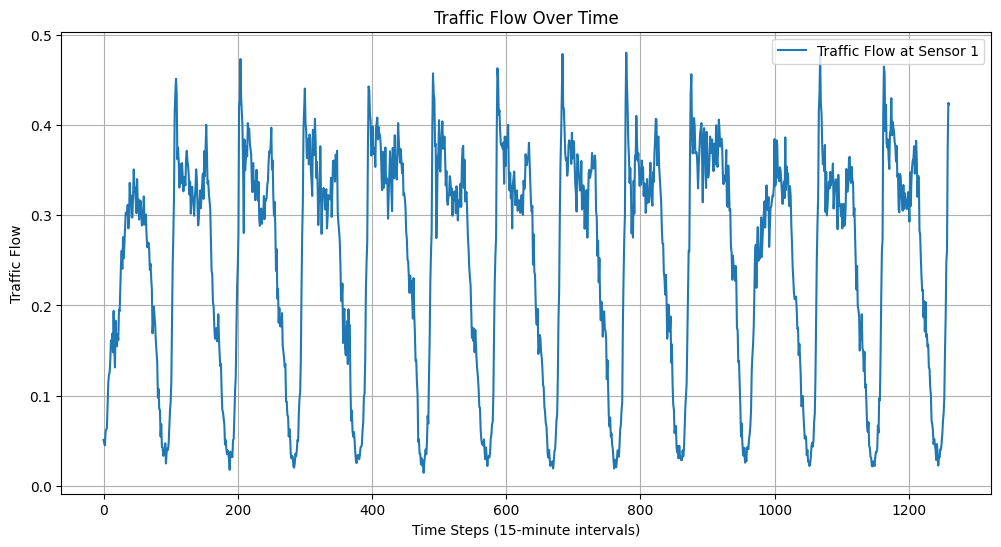

In [68]:
# 1. Time-Series Plot of Traffic Flow vs. Time for a Selected Location
plt.figure(figsize=(12, 6))
location_index = 0  # Change this to plot data from different locations
traffic_flow_series = tra_Y_tr[location_index, :]  # Traffic flow for the selected location
plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Traffic Flow at Sensor {location_index + 1}')
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time')
plt.grid(True)
plt.legend()
plt.show()

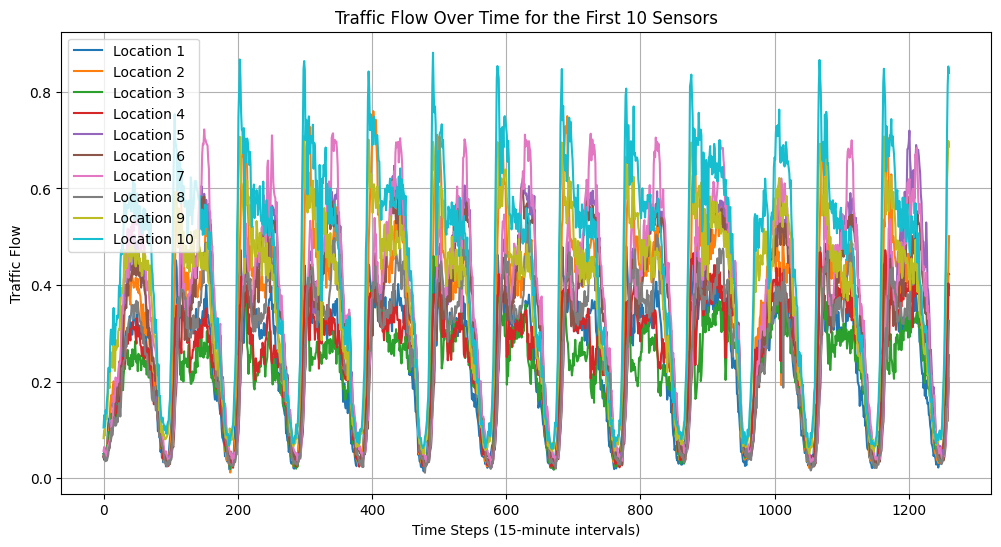

In [66]:
# Create a figure to plot traffic flow for the first 10 locations
plt.figure(figsize=(12, 6))

# Plot traffic flow for each of the first 10 locations
for location_index in range(10):  # Plotting for the first 10 locations
    traffic_flow_series = tra_Y_tr[location_index, :]  # Extract traffic flow for the selected location
    plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Location {location_index + 1}')

# Add labels and title
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time for the First 10 Sensors')
plt.grid(True)
plt.legend()
plt.show()

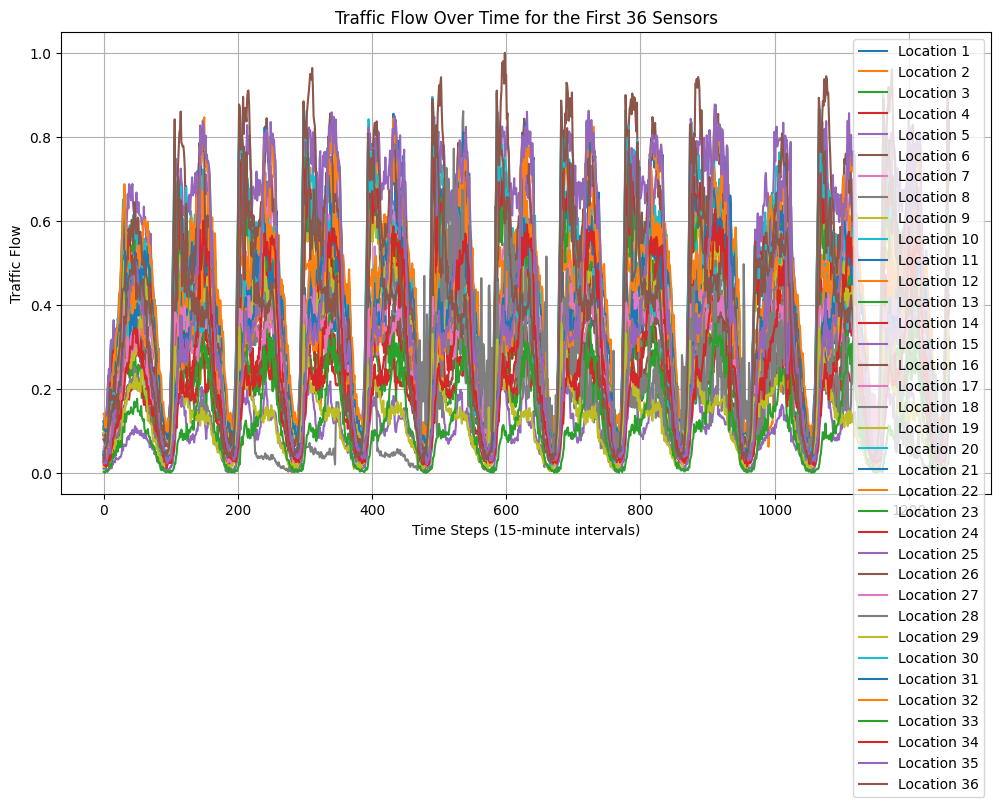

In [67]:
# Create a figure to plot traffic flow for the first 10 locations
plt.figure(figsize=(12, 6))

# Plot traffic flow for each of the first 10 locations
for location_index in range(36):  # Plotting for the first 10 locations
    traffic_flow_series = tra_Y_tr[location_index, :]  # Extract traffic flow for the selected location
    plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Location {location_index + 1}')

# Add labels and title
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time for the First 36 Sensors')
plt.grid(True)
plt.legend()
plt.show()

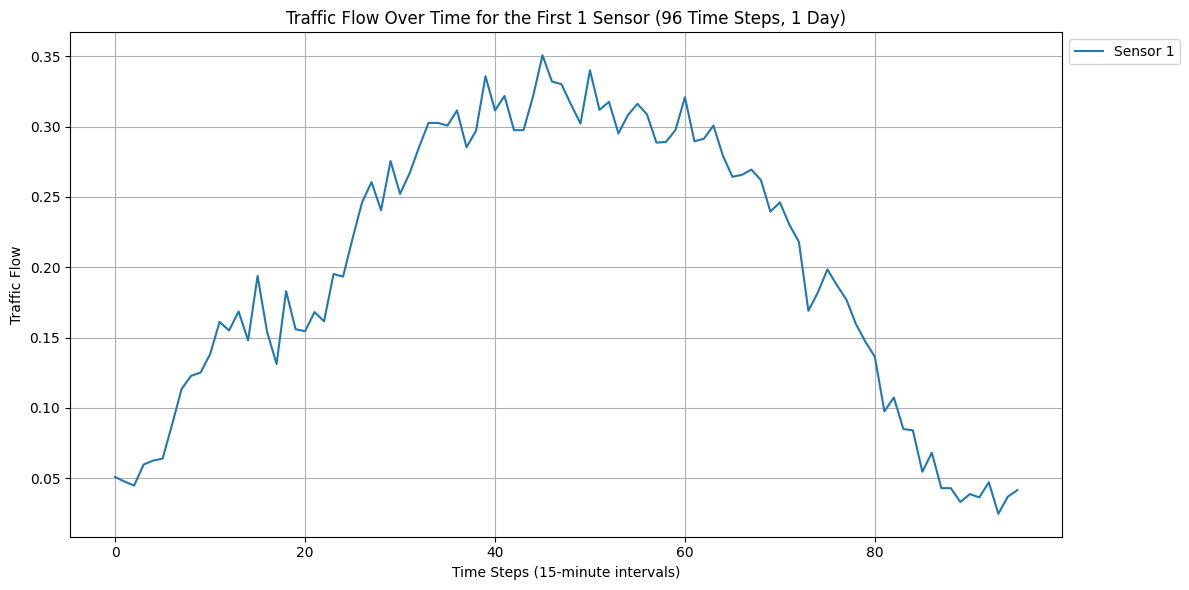

In [69]:
import matplotlib.pyplot as plt
import pickle

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Create a figure to plot traffic flow for the first 10 locations
plt.figure(figsize=(12, 6))

# Plot traffic flow for each of the first 10 locations, limiting the time steps from 0 to 34
for location_index in range(1):  # Plotting for the first 10 locations
    traffic_flow_series = tra_Y_tr[location_index, :96]  # Extract the first 35 time steps (0 to 34)
    plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Sensor {location_index + 1}')

# Add labels and title
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time for the First 1 Sensor (96 Time Steps, 1 Day)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


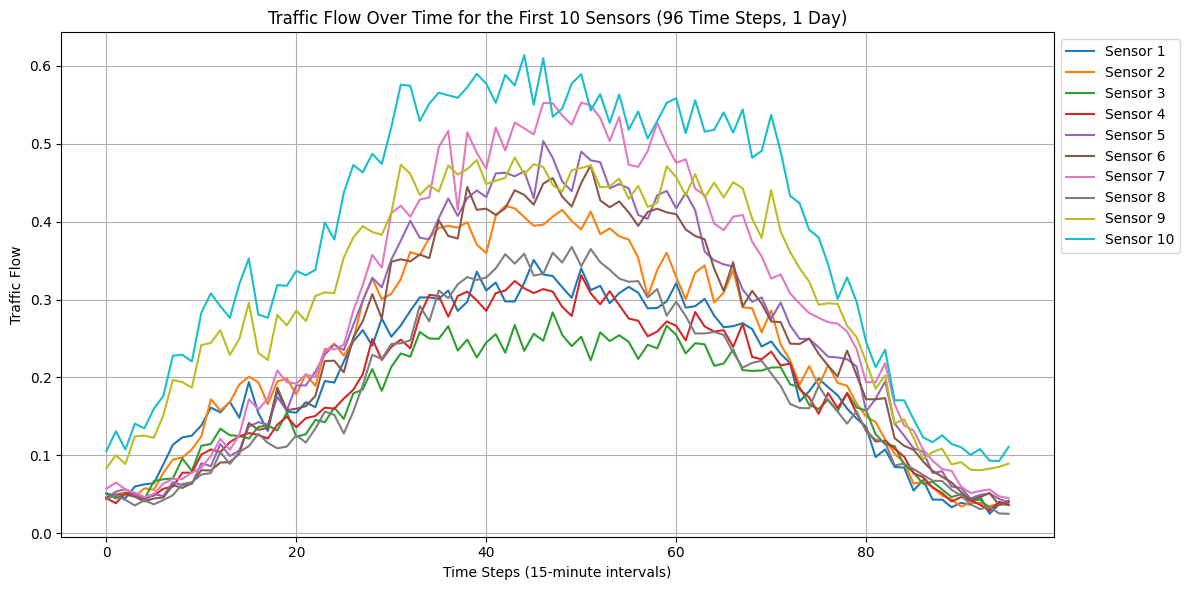

In [70]:
import matplotlib.pyplot as plt
import pickle

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Create a figure to plot traffic flow for the first 10 locations
plt.figure(figsize=(12, 6))

# Plot traffic flow for each of the first 10 locations, limiting the time steps from 0 to 34
for location_index in range(10):  # Plotting for the first 10 locations
    traffic_flow_series = tra_Y_tr[location_index, :96]  # Extract the first 35 time steps (0 to 34)
    plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Sensor {location_index + 1}')

# Add labels and title
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time for the First 10 Sensors (96 Time Steps, 1 Day)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


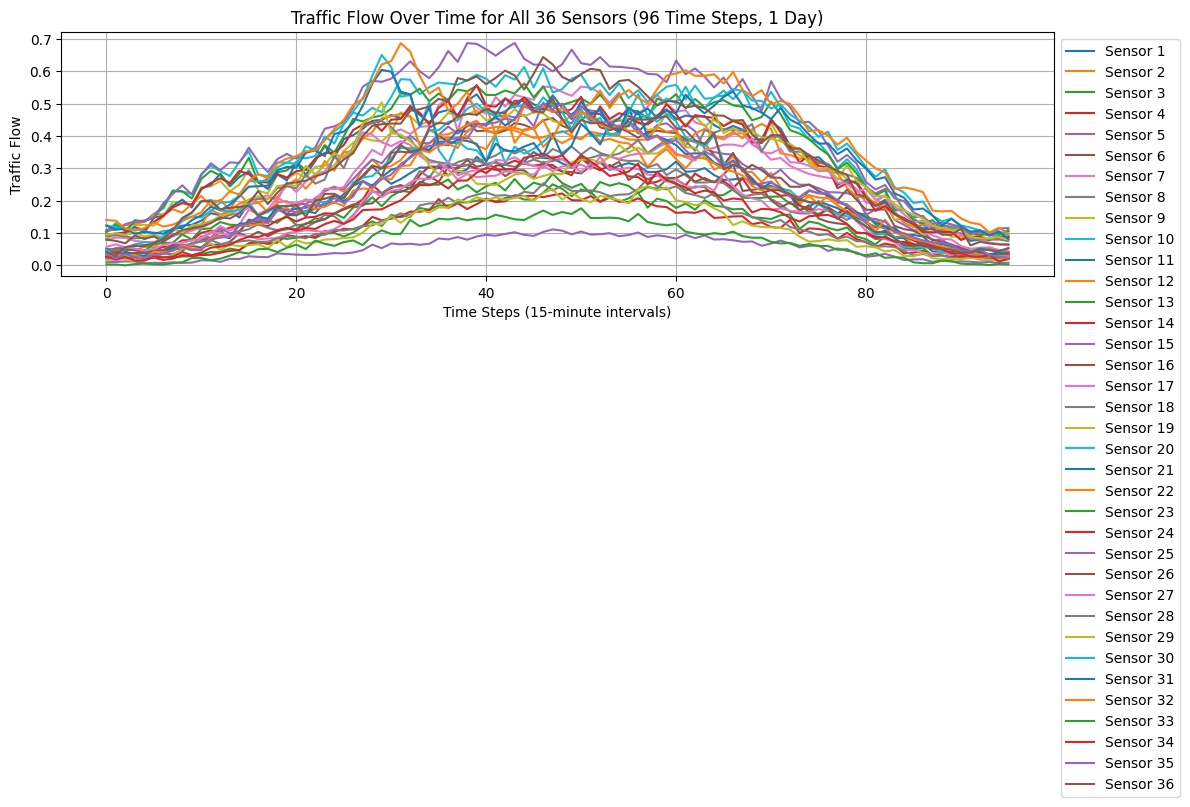

In [64]:
import matplotlib.pyplot as plt
import pickle

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Create a figure to plot traffic flow for all 36 locations (sensor locations)
plt.figure(figsize=(12, 6))

# Plot traffic flow for each of the 36 locations, limiting the time steps to the first 96 (representing one day)
for location_index in range(36):  # Plotting for all 36 sensor locations
    traffic_flow_series = tra_Y_tr[location_index, :96]  # Extract the first 96 time steps (0 to 95)
    plt.plot(range(len(traffic_flow_series)), traffic_flow_series, label=f'Sensor {location_index + 1}')

# Add labels and title
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow Over Time for All 36 Sensors (96 Time Steps, 1 Day)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


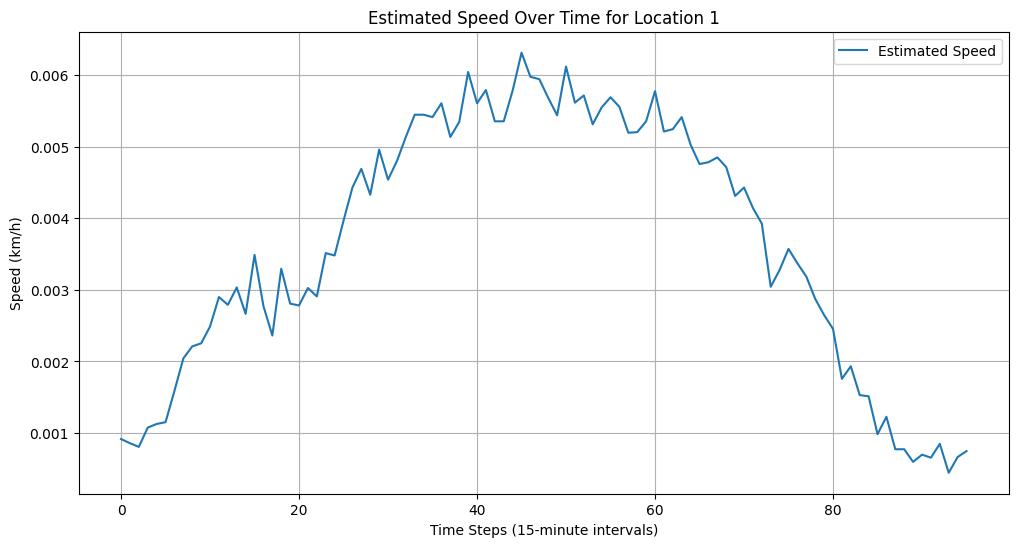

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Load the data
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Example assumptions
average_vehicle_length = 4.5  # in meters
time_interval = 0.25  # in hours (15 minutes)

# Calculate speed for each location
speeds = []

for location_index in range(36):  # Assuming 36 locations
    # Get traffic volume (number of vehicles) for the first 96 time steps (one day)
    traffic_volume = tra_Y_tr[location_index, :96]  # Limit to one day of data

    # Estimate speed (using placeholder values, update with actual occupancy if available)
    # Simplified assumption without occupancy
    estimated_speed = (traffic_volume * average_vehicle_length) / (time_interval * 1000)  # Converting to km/h
    speeds.append(estimated_speed)

# Plot Speed vs. Time for Location 1 (Example)
plt.figure(figsize=(12, 6))
plt.plot(speeds[0], label='Estimated Speed')  # Plot speed for the first location
plt.xlabel("Time Steps (15-minute intervals)")
plt.ylabel("Speed (km/h)")
plt.title("Estimated Speed Over Time for Location 1")
plt.grid(True)
plt.legend()
plt.show()


### Auto-Correlation Plot and Partial Autocorrelation Plot

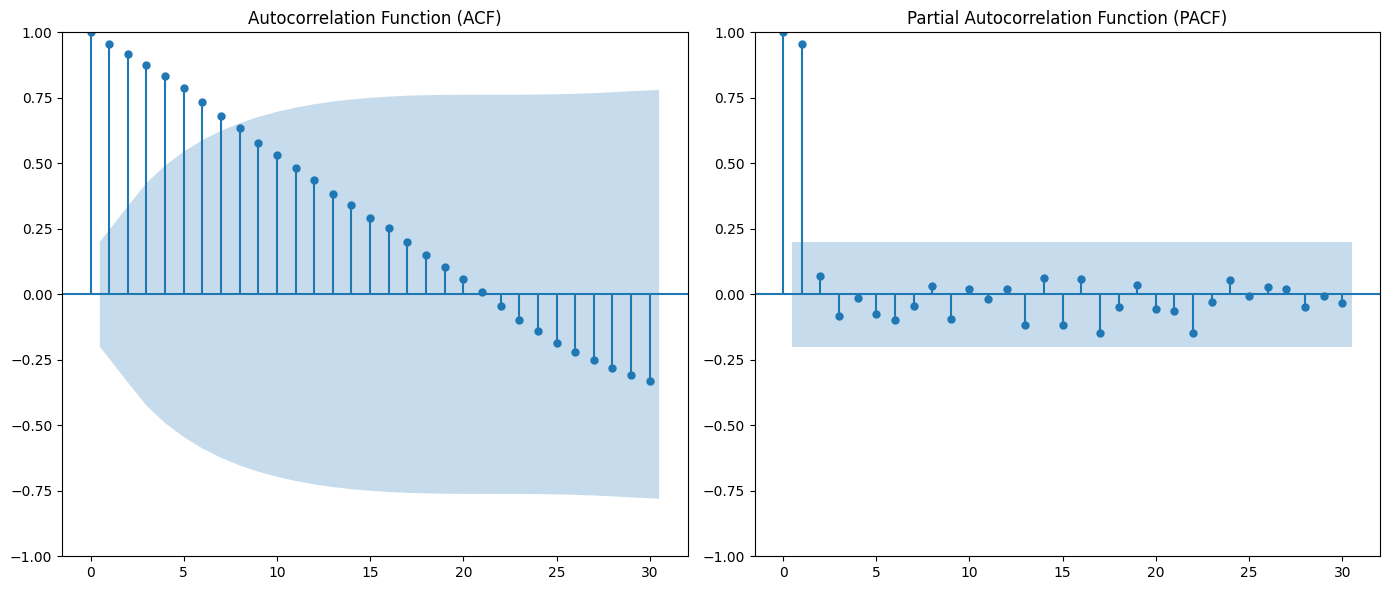

In [71]:
import matplotlib.pyplot as plt
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Extract traffic flow data for a specific location (e.g., Location 1)
location_index = 0  # You can change this to analyze other locations
traffic_flow_series = tra_Y_tr[location_index, :96]  # Limiting to the first 96 time steps (one day)

# Plotting ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(traffic_flow_series, lags=30, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(traffic_flow_series, lags=30, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


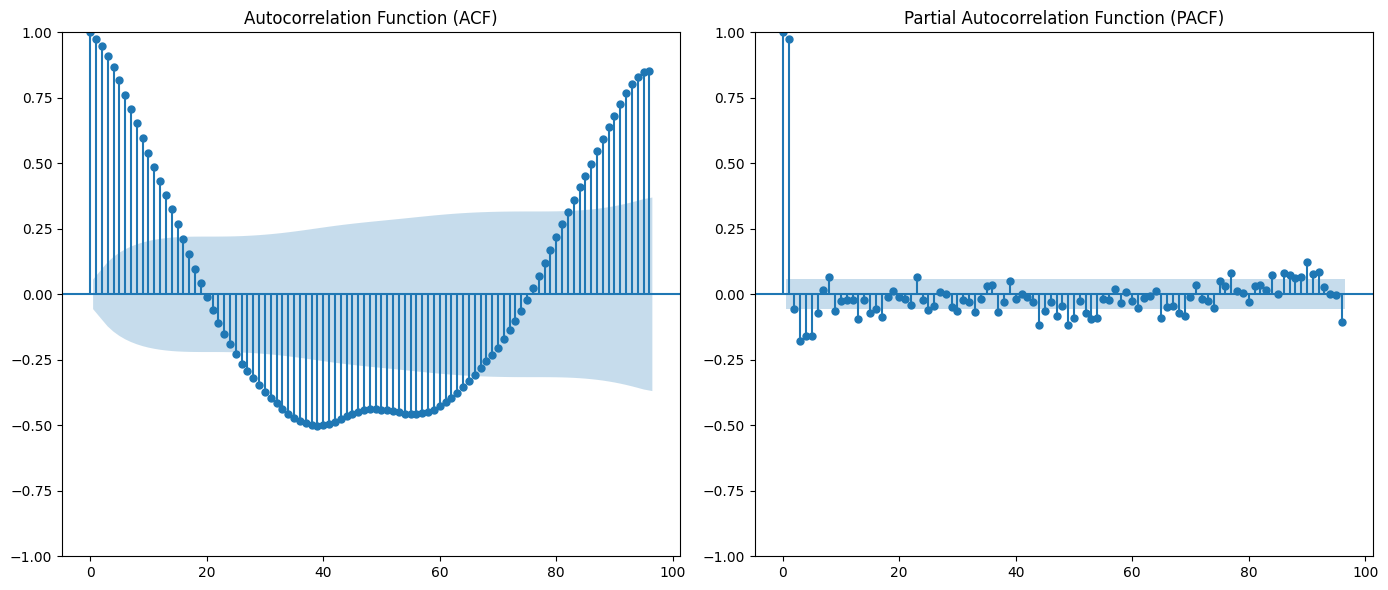

In [85]:
import matplotlib.pyplot as plt
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Extract traffic flow data for a specific location (e.g., Location 1)
location_index = 0  # You can change this to analyze other locations
traffic_flow_series = tra_Y_tr[location_index, :1200]  # Limiting to the first 96 time steps (one day)

# Plotting ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(traffic_flow_series, lags=96, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(traffic_flow_series, lags=96, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


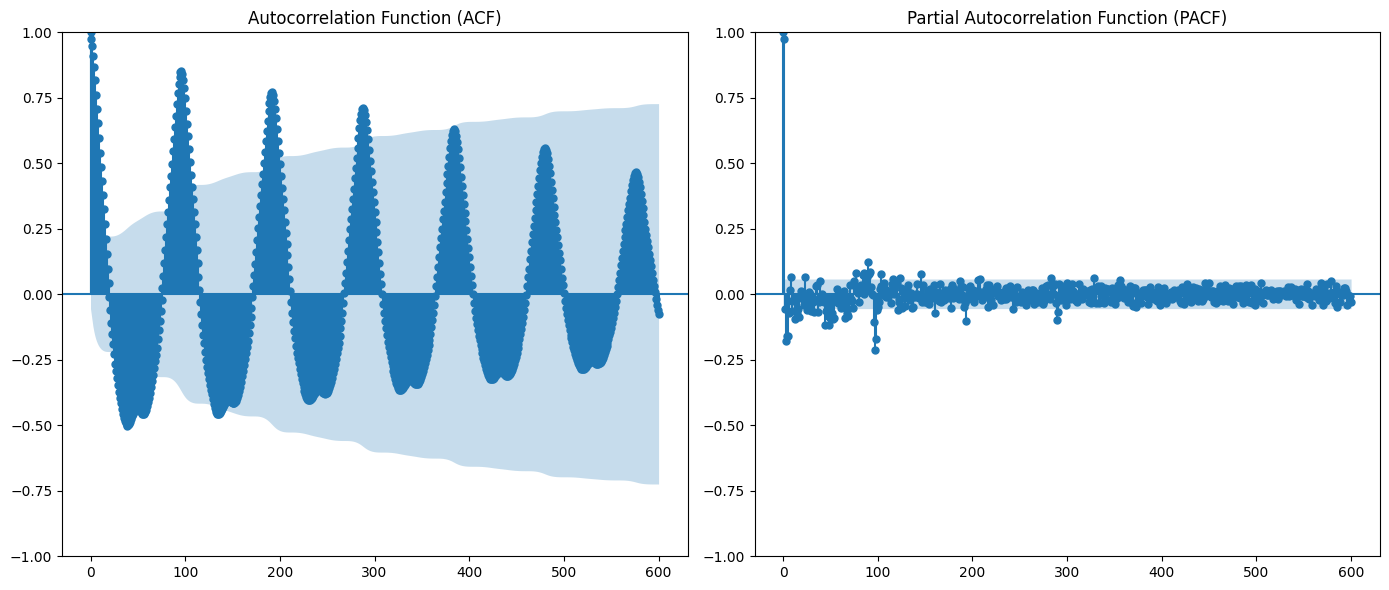

In [87]:
import matplotlib.pyplot as plt
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data from pickle files
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Extract traffic flow data for a specific location (e.g., Location 1)
location_index = 0  # You can change this to analyze other locations
traffic_flow_series = tra_Y_tr[location_index, :1200]  # Limiting to the first 96 time steps (one day)

# Plotting ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(traffic_flow_series, lags=600, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(traffic_flow_series, lags=600, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


### Additional Visualizations

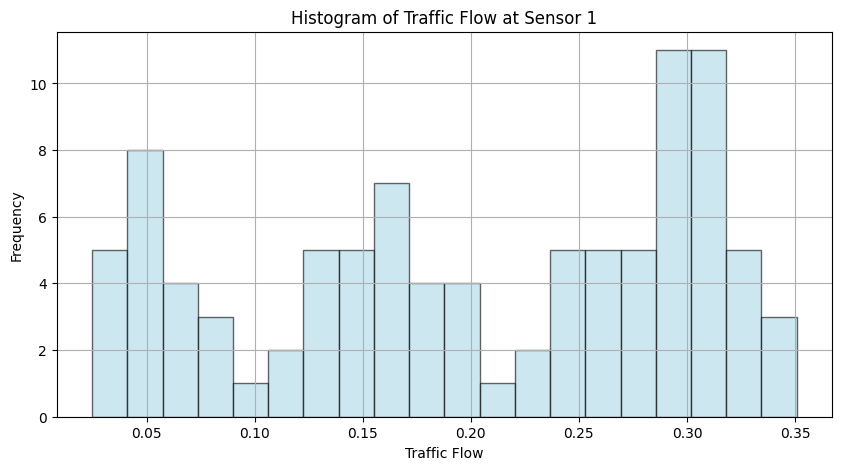

In [99]:
# Convert to DataFrame for easier manipulation
df_tra_Y_tr = pd.DataFrame(tra_Y_tr)

# Example: Extract traffic flow data for the first location (location_index = 0)
traffic_flow_series = df_tra_Y_tr.iloc[0, :96]  # Use first 96 time steps (representing one day)

# 1. Histogram of Traffic Flow
plt.figure(figsize=(10, 5))
plt.hist(traffic_flow_series, bins=20, color='lightblue', edgecolor='black', alpha=0.6)
plt.title('Histogram of Traffic Flow at Sensor 1')
plt.xlabel('Traffic Flow')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

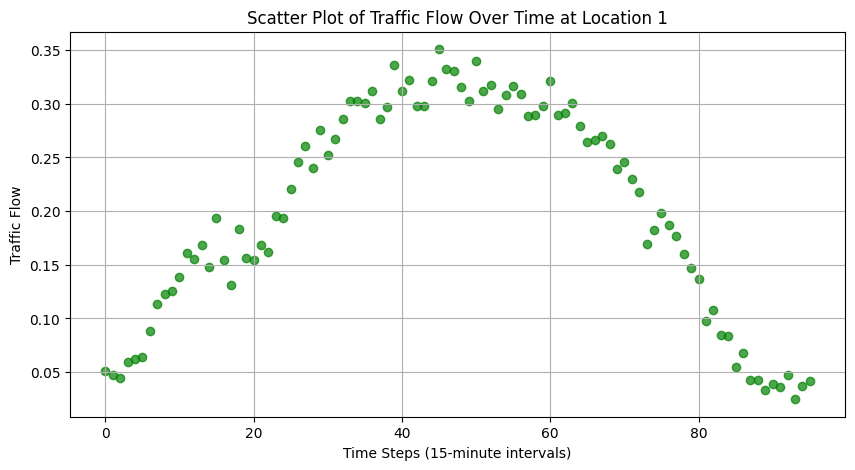

In [100]:
# 2. Scatter Plot of Traffic Flow Over Time
plt.figure(figsize=(10, 5))
plt.scatter(range(len(traffic_flow_series)), traffic_flow_series, color='green', alpha=0.7)
plt.title('Scatter Plot of Traffic Flow Over Time at Location 1')
plt.xlabel('Time Steps (15-minute intervals)')
plt.ylabel('Traffic Flow')
plt.grid(True)
plt.show()

Type of tra_X_tr_data: <class 'numpy.ndarray'>
Number of time steps in tra_X_tr_data: 1261


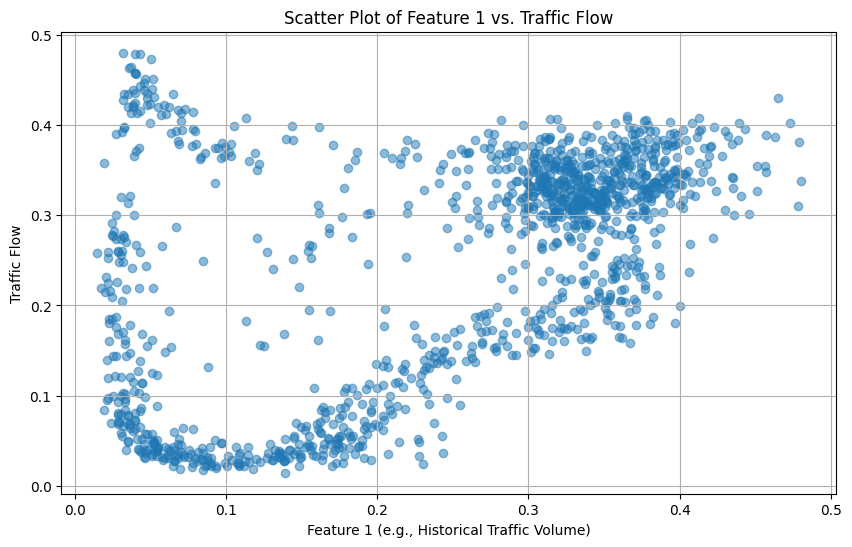

In [101]:
# Access the first element which contains all the matrices
tra_X_tr_data = tra_X_tr[0]  # Extract the list of matrices corresponding to each time step

# Check the type and length to understand the structure
print(f"Type of tra_X_tr_data: {type(tra_X_tr_data)}")
print(f"Number of time steps in tra_X_tr_data: {len(tra_X_tr_data)}")

# Define indices
location_index = 0  # Index of the location to analyze
feature_index = 0   # Index of the feature to analyze

# Extract the traffic flow series for the specified location
traffic_flow_series = tra_Y_tr[location_index, :]

# Extract the feature series for the specified location and feature index across all time steps
# We need to iterate through each time step matrix to extract the feature for the specific location
feature_series = [tra_X_tr_data[i][location_index, feature_index] for i in range(len(tra_X_tr_data))]

# Check if the lengths match and plot if they do
if len(feature_series) == len(traffic_flow_series):
    plt.figure(figsize=(10, 6))
    plt.scatter(feature_series, traffic_flow_series, alpha=0.5)
    plt.xlabel('Feature 1 (e.g., Historical Traffic Volume)')
    plt.ylabel('Traffic Flow')
    plt.title('Scatter Plot of Feature 1 vs. Traffic Flow')
    plt.grid(True)
    plt.show()
else:
    print("Feature series and traffic flow series do not match in length.")

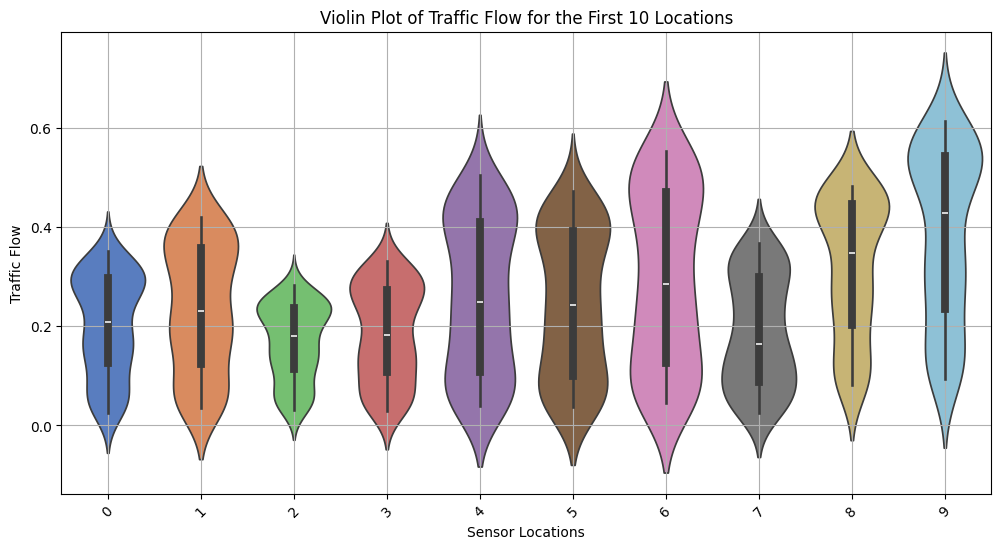

In [102]:
# 3. Violin Plot of Traffic Flow Across Multiple Locations
# Select the first 10 locations to visualize their distributions
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_tra_Y_tr.iloc[:10, :96].T, palette='muted')  # Plotting distributions for the first 10 locations
plt.title('Violin Plot of Traffic Flow for the First 10 Locations')
plt.xlabel('Sensor Locations')
plt.ylabel('Traffic Flow')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

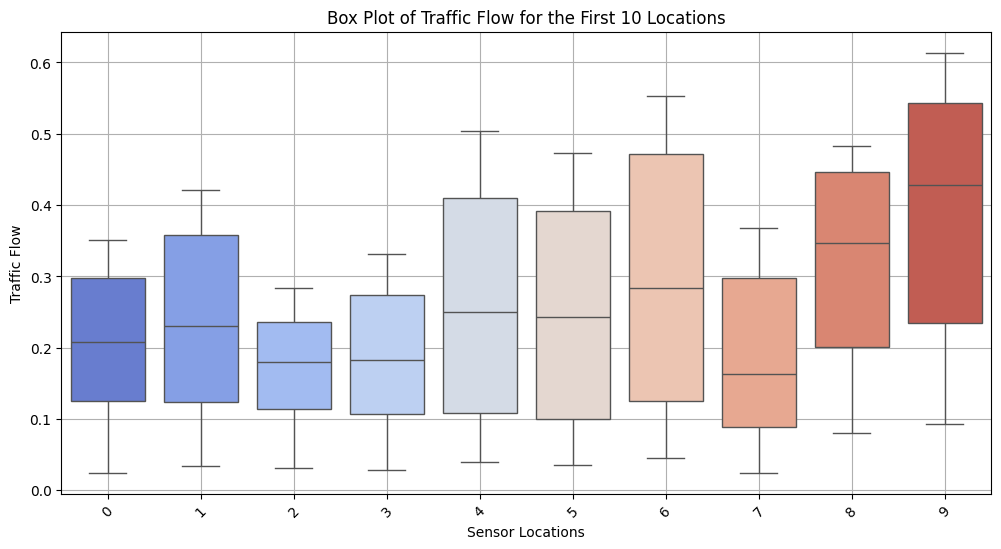

In [103]:
# 4. Box Plot of Traffic Flow Across Multiple Locations
# Using the same data as the violin plot to compare distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tra_Y_tr.iloc[:10, :96].T, palette='coolwarm')  # Box plot for the first 10 locations
plt.title('Box Plot of Traffic Flow for the First 10 Locations')
plt.xlabel('Sensor Locations')
plt.ylabel('Traffic Flow')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

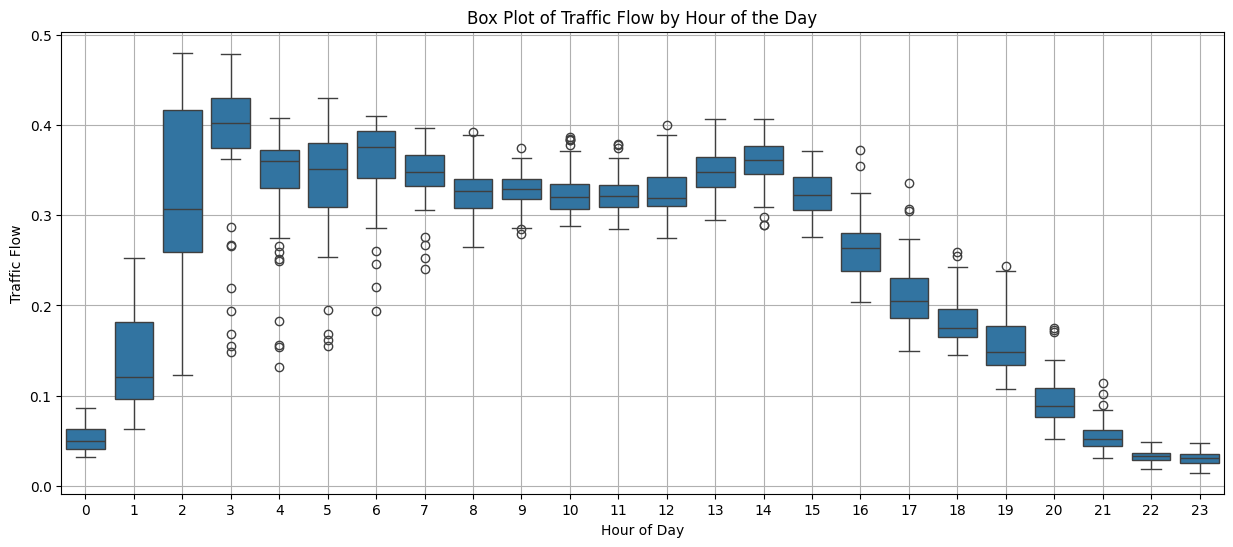

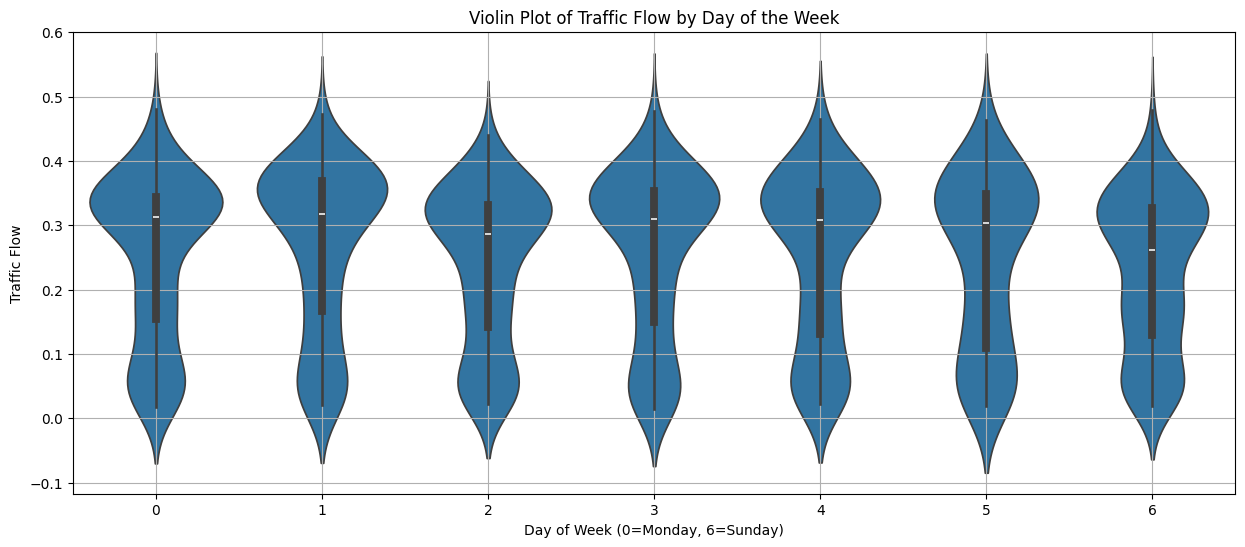

In [107]:
# Extract the traffic flow series for a specific location (e.g., location 0)
location_index = 0
traffic_flow_series = tra_Y_tr[location_index, :]

# Create a time index with 15-minute intervals
time_index = pd.date_range(start="2017-01-01", periods=len(traffic_flow_series), freq="15min")

# Create the DataFrame with the correct time index
df_traffic_flow = pd.DataFrame({'Traffic Flow': traffic_flow_series}, index=time_index)

# Ensure that the DataFrame has no missing time periods and correct frequency assignment
df_traffic_flow = df_traffic_flow.asfreq('15min')  # Ensure proper time intervals

# Add time features for analysis
df_traffic_flow['Hour'] = df_traffic_flow.index.hour
df_traffic_flow['DayOfWeek'] = df_traffic_flow.index.dayofweek

# Box Plot: Traffic Flow by Hour of the Day
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hour', y='Traffic Flow', data=df_traffic_flow)
plt.title('Box Plot of Traffic Flow by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Flow')
plt.grid(True)
plt.show()

# Violin Plot: Traffic Flow by Day of the Week
plt.figure(figsize=(15, 6))
sns.violinplot(x='DayOfWeek', y='Traffic Flow', data=df_traffic_flow)
plt.title('Violin Plot of Traffic Flow by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Traffic Flow')
plt.grid(True)
plt.show()